In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle code display on/off."></form>''')

# from http://stackoverflow.com/questions/27934885/how-to-hide-code-from-cells-in-ipython-notebook-visualized-with-nbviewer


<h2>A very short answer</h2>

In compuntational ML what matters for "hardness" of learning is distance to the classification boundary. 

For example: for any hyperplane separating the two classes perfectly (a line in the 2D case) - what could matter is the distance to the sample closest to the hyperplane (line). In modern ML it usually does not matter how the boundary is oriented.



<hr />
<hr />
<hr />

<h3>A slightly longer answer</h3>

Suppose the two classes come from normal distibutions with mean $\mu_1 = (low,low)$ and $\mu_2 = (high,high)$ and variance $\sigma^2=1.0$.

We can visualize this by a picture below:

Generated data. Green points are from class 1, blue from class 2


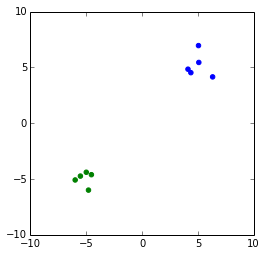

In [4]:
def generate_data(c1_mu, c2_mu, n, sigma=1.0):
    c1 = np.random.randn(n,2)*sigma+np.array(c1_mu)
    c2 = np.random.randn(n,2)*sigma+np.array(c2_mu)
    print "Generated data. Green points are from class 1, blue from class 2"
    plt.scatter(c1[:,0], c1[:,1], color='g')
    plt.scatter(c2[:,0], c2[:,1], color='b')
    plt.xlim([-10, 10])
    plt.ylim([-10, 10])
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()
    return c1, c2

# Generate low-low high-high data.
n = 5
low = -5
high = 5
c1_mu = np.array([low, low])
c2_mu = np.array([high, high])
c1, c2 = generate_data(c1_mu, c2_mu, n)

<hr />

First, suppose we are learning a simple linear classifier. In the case of a very simple perceptron (a neural network with no hidden layers) we will try to learn a matrix $W$ and a weight vector $b$ such that:

$y = Wx_{class_1} + b < 0$ 
and 
$y = Wx_{class_2} + b > 0$

The perceptron learning algorithm adjusts the decision boundary on every iteration when the perceptron makes a mistake on the presented sample. 

Below I coded up a very simple visualization that would take the above dataset and iterate on to learn the linear deicision bounday.

Iteration 0


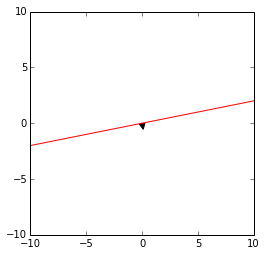

Iteration 1


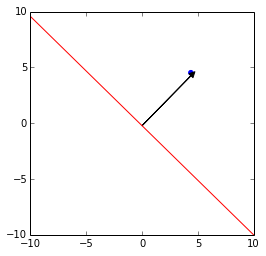

Iteration 2


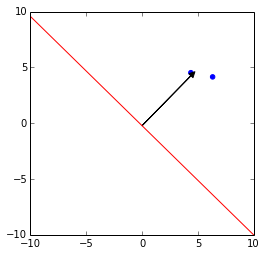

Iteration 4


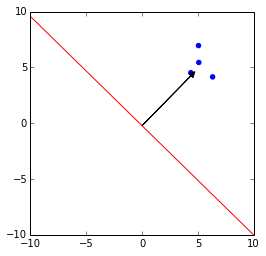

Iteration 8


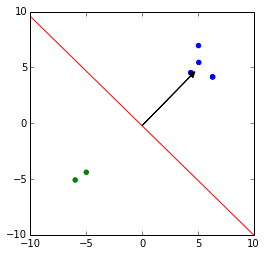

Iteration 16


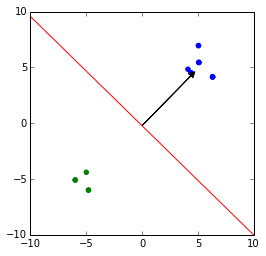

In [5]:
def get_train_pt(c1, c2, i):
    if np.random.rand() < 0.5:
        return c1[i, :], -1
    else:
        return c2[i, :], 1

def pts_on_the_line(W, b):
    # Solve w[0]*x + w[1]*y + b for the value of y.
    if (W[1] == W[0] == 0): return 0,0,0,0
    if (W[1] == 0): return -b/W[0], -10, -b/W[0], 10
    x1 = -10
    y1 = -W[0]/W[1] * x1 - b/W[1]
    x2 = 10
    y2 = -W[0]/W[1] * x2 - b/W[1]
    return x1, y1, x2, y2

def plot(train_c1_x1, train_c1_x2, train_c2_x1, train_c2_x2, W, b):
    plt.scatter(train_c1_x1, train_c1_x2, color='g')
    plt.scatter(train_c2_x1, train_c2_x2, color='b')
    # Plot two points on the decision boundary Wx+b=0
    x1, y1, x2, y2 = pts_on_the_line(W, b)
    plt.plot([x1, x2], [y1, y2], 'r-')
    # Plot the normal vector in the direction of positive samples.
    ax = plt.axes()
    ax.arrow((x1+x2)/2, (y1+y2)/2, W[0]/10, W[1]/10, head_width=0.5, head_length=0.5, fc='k', ec='k')
    plt.xlim([-10, 10])
    plt.ylim([-10, 10])
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

def predict(pt, W, b):
    res = W.dot(pt) + b
    if res < 0:
        return -1
    else:
        return 1

def train_perceptron(c1, c2):
    num_iter = 17
    W = np.array([0.1, -0.5])
    b = 0.0
    learninig_rate = 5.0
    errors = 0
    train_c1_x1 = []
    train_c1_x2 = []
    train_c2_x1 = []
    train_c2_x2 = []
    for i in xrange(num_iter):
        if ((i == 0) or (np.log2(i)%1 == 0)):
            print "Iteration", i
            plot(train_c1_x1, train_c1_x2, train_c2_x1, train_c2_x2, W, b)
        # Pick a random point from the training set.
        pt, y = get_train_pt(c1, c2, i%n)
        if (y < 0):
            train_c1_x1.append(pt[0])
            train_c1_x2.append(pt[1])
        else:
            train_c2_x1.append(pt[0])
            train_c2_x2.append(pt[1])
        y_pred = predict(pt, W, b)
        err = y - y_pred
        if (err):
            W += learninig_rate * err * pt
            b += learninig_rate * err * 1

# Run the perceptron algorithm for a few iterations.
train_perceptron(c1, c2)

<hr />
<h4>Learning "low-high high-low"</h4>

In the above you can see that a good separation is found very quickly.
But then the same behavior would be observed for the "low-high high-low" case too!


Generated data. Green points are from class 1, blue from class 2


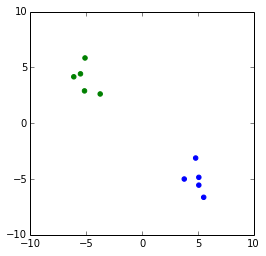

Iteration 0


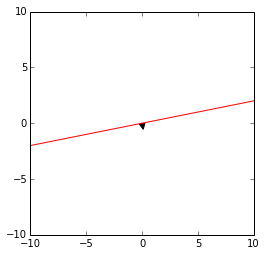

Iteration 1


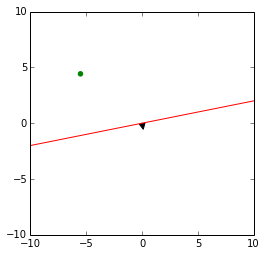

Iteration 2


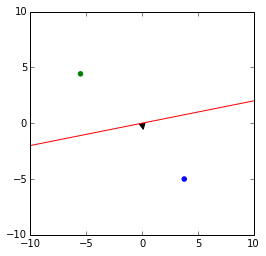

Iteration 4


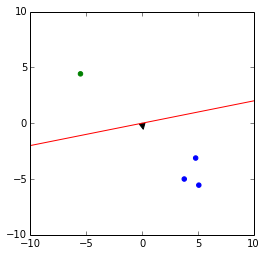

Iteration 8


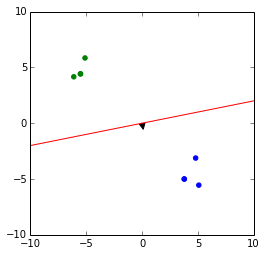

Iteration 16


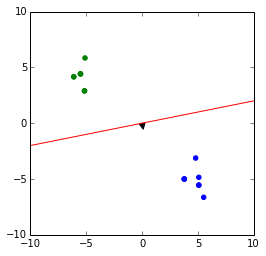

In [6]:
# Run the perceptron algorithm for a few iterations.
c1_mu = [low, high]
c2_mu = [high, low]
c1, c2 = generate_data(c1_mu, c2_mu, n)
train_perceptron(c1, c2)


<hr/>
<hr/>
<hr/>

<h4> The Symmetry </h4>

The issue here is that the problem is symmetric: if you flip one of the axes, then the "low-high high-low" becomes  "low-low, high-high" setting. So it is no different from the general learning perspective.

But what would make the setting harder is bringing the two clusters closer in the mean.
Suppose that instead of $\mu_2 = (high,high)$, the second mean was and $\mu_2 = (low+1.0,low+1.0)$. And now we can see that we are not learning a good decision boundary nearly as fast.


Generated data. Green points are from class 1, blue from class 2


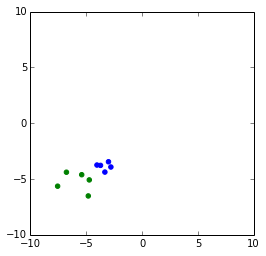

Iteration 0


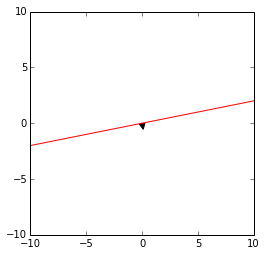

Iteration 1


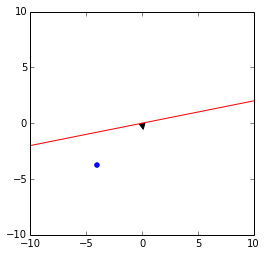

Iteration 2


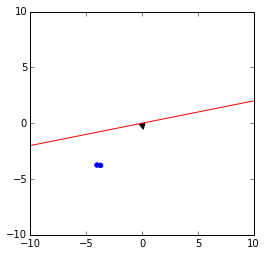

Iteration 4


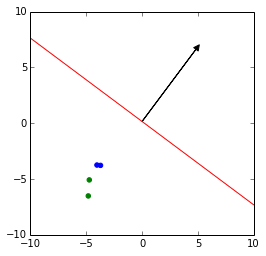

Iteration 8


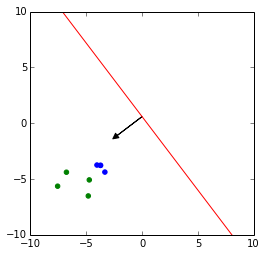

Iteration 16


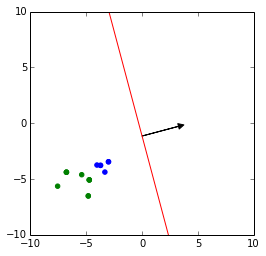

In [13]:
c1_mu = [low, low]
c2_mu = [low+1.0, low+1.0]
c1, c2 = generate_data(c1_mu, c2_mu, n)
train_perceptron(c1, c2)

<hr/>
<hr/>
<hr/>

<h4>The Hardness</h4>

"Harder to classify" can be interpreted in slightly different ways. One of the standard ways is measuring how many errors an algorithm will make before learning the correct separating boundary. And one way to start looking at this is: if we start with random weighs, how many samples will we need to be able to reliably distinguish the data.

But when starting from randomly chosen weights and updating using randomly chosen samples: the two settings are not fundamentally different.


<h4>The Intuition</h4>

So then where does the intuition of "low-low high-high" being simpler come from?
One source could be the fact that it is harder for us to think intuitively of negative numbers: addition is intuitively simpler than subtraction. Indeed, if we are only allowed to add the numbers coming into the clasifier, and then set a separating threshold: the "low-high high-low" setting could be impossible to learn.


So is this intuition wrong? Not always. 

In real-world biological systems there might be certain constraints which make addition easier than sibtraction. Such systems might learn using the perceptron rule, but there might be asymmetry in how easy it is to adjust weights in different directions. Are you considering a setting where the system might not be symmetric in its ability to add vs subtract? Maybe something along the lines of stimulation and inhibition being asymmetric? Then the intuition could indeed be applicable.

There could also be a very strong prior that biases the systems to be successful in learning the "low-low high-high" setting faster. For example, if the environment is mostly composed of "low-low high-high" settings, then the organisms living in this environment could be biased to be able to learn such settings better. Could such priors be prevalent in the biological systems you are considering? Perhaps you can think of specific examples/arguments and then use these to show why this intuition could be applicable in your situation.




<hr/>
<hr/>
<hr/>

<h4>Generally useful literature</h4>

I'll add more here if we have a further discussion, but for now:

<hr />
One example of an illustrative ML book: <i>"Pattern Recognition and Machine Learning" by Bishop</i>.

https://www.amazon.com/Pattern-Recognition-Learning-Information-Statistics/dp/0387310738

This is one of the best books on intro to ML: sufficiently mathematically rigurous, but also illustrative. A copy of it seems to be available here: http://users.isr.ist.utl.pt/~wurmd/Livros/school/Bishop%20-%20Pattern%20Recognition%20And%20Machine%20Learning%20-%20Springer%20%202006.pdf

<hr />

An older classic with a bit more intro to learning theory (complexity, mistake bounds, etc): <i>Tom Mitchell's "Machine Learning"</i> book:

http://www.cs.cmu.edu/~tom/mlbook.html

https://www.amazon.com/Learning-McGraw-Hill-International-Editions-Computer/dp/0071154671
